In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
data=pd.read_csv('UberDataset.csv')

In [11]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [12]:
data.tail()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


                                                           DATA PREPROCESSING

In [15]:
data['PURPOSE'].fillna("NOT",inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_9788\951316208.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['PURPOSE'].fillna("NOT",inplace=True)


In [16]:
data.tail()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NOT


In [19]:
data['START_DATE']=pd.to_datetime(data['START_DATE'],errors='coerce') #coerce is used to put NAT  value to invalid data
data['END_DATE']=pd.to_datetime(data['END_DATE'],errors='coerce')

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  421 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     1156 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [22]:
#CREATING COLUMNS 
from datetime import datetime
data['date']=pd.DatetimeIndex(data['START_DATE']).date
data['time']=pd.DatetimeIndex(data['START_DATE']).hour

In [23]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0


In [25]:
data['day-night']=pd.cut(x=data['time'],bins=[0,10,15,19,24],labels=['MORNING','AFTERNOON', 'EVENING','NIGHT'])

In [26]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,NIGHT
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,MORNING
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,NIGHT
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,EVENING
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,AFTERNOON


In [28]:
data.dropna(inplace=True)
data.shape

(413, 10)

                                                        DATA VISUALISATION

<Axes: xlabel='count', ylabel='PURPOSE'>

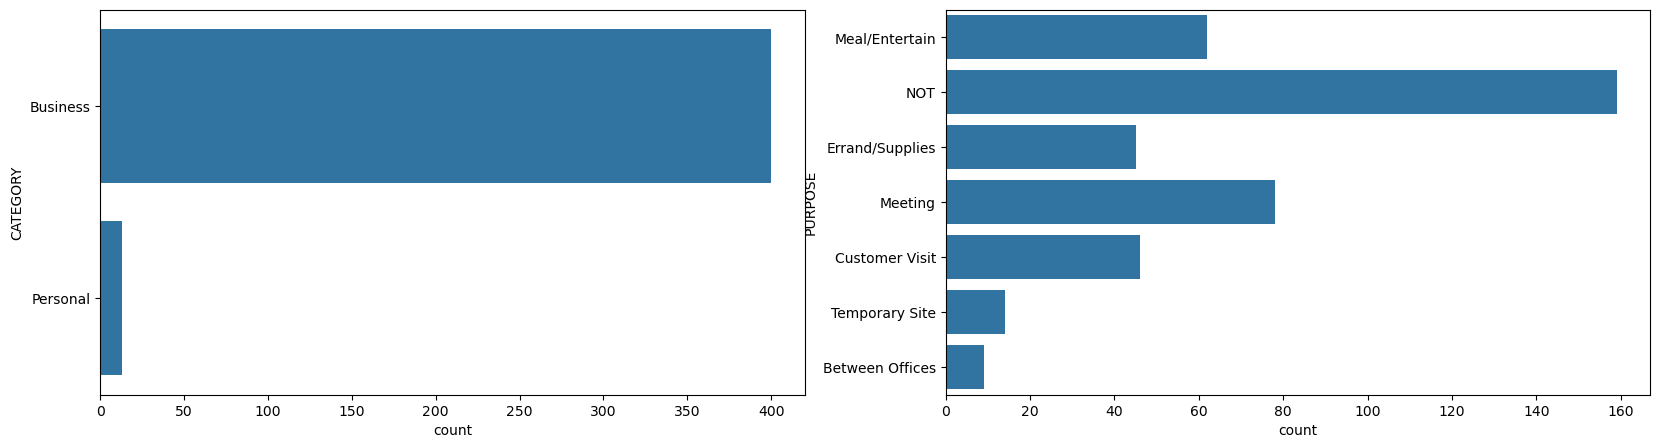

In [37]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(data['CATEGORY'])
plt.subplot(1,2,2)
sns.countplot(data['PURPOSE'])


<Axes: xlabel='count', ylabel='day-night'>

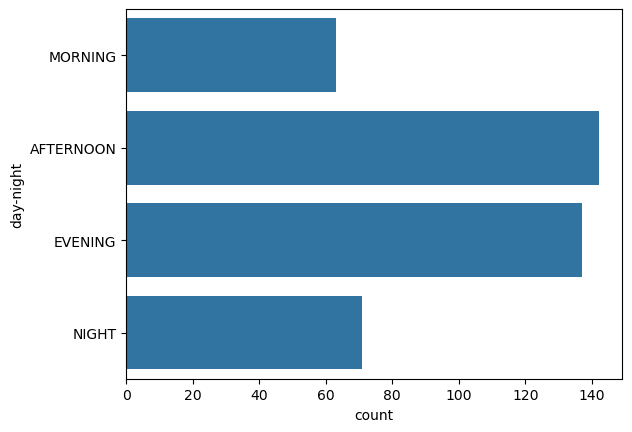

In [41]:
sns.countplot(data['day-night'])

In [43]:
data['MONTH']=pd.DatetimeIndex(data['START_DATE']).month

month_label={1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'April', 5.0: 'May', 6.0: 'June',
             7.0: 'July', 8.0: 'Aug', 9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'}

data["MONTH"]=data.MONTH.map(month_label)
mon=data.MONTH.value_counts(sort=False)

[Text(0.5, 0, 'MONTHS'), Text(0, 0.5, 'COUNT')]

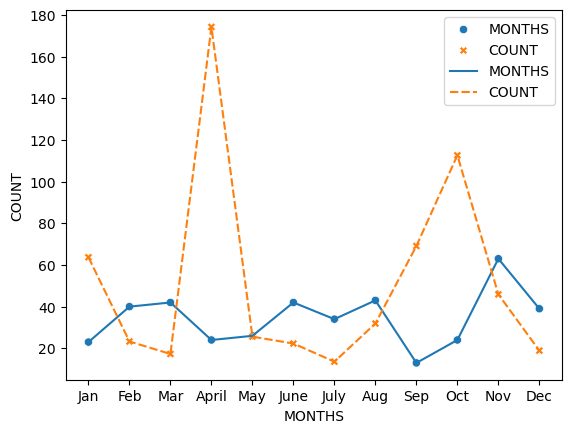

In [46]:
df=pd.DataFrame( {
                "MONTHS":mon.values,
                "COUNT":data.groupby('MONTH',sort=False)['MILES'].max()
})

q=sns.scatterplot(data=df)
q.set(xlabel="MONTHS", ylabel="COUNT")

p=sns.lineplot(data=df)
p.set(xlabel="MONTHS", ylabel="COUNT")

    WE OBSERVE THAT IN THE WINTER MONTHS i.e. NOVEMBER, DECEMBER, JANUARY, FEBRUARY BOOKINGS ON UBER ARE USUALLY LOW

In [53]:
data['DAY']=pd.DatetimeIndex(data['START_DATE']).day

day_label={0: 'MON', 1: 'TUES', 2: 'WED', 3: 'THURS', 4: 'FRI', 5: 'SAT',
             6: 'SUN'}

data["DAY"]=data.DAY.map(day_label)
don=data.DAY.value_counts(sort=False)

Text(0, 0.5, 'COUNT')

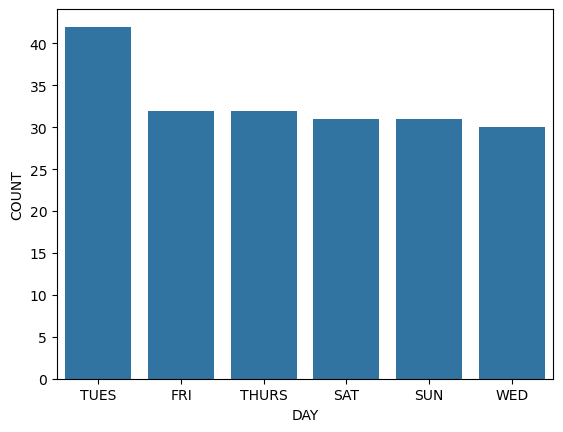

In [54]:
day_label=data.DAY.value_counts()
sns.barplot(x=day_label.index, y=day_label)
plt.xlabel('DAY')
plt.ylabel('COUNT')

In [55]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night,MONTH,DAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,NIGHT,Jan,TUES
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,MORNING,Jan,WED
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,NIGHT,Jan,WED
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,EVENING,Jan,SAT
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,AFTERNOON,Jan,SUN


<Axes: ylabel='MILES'>

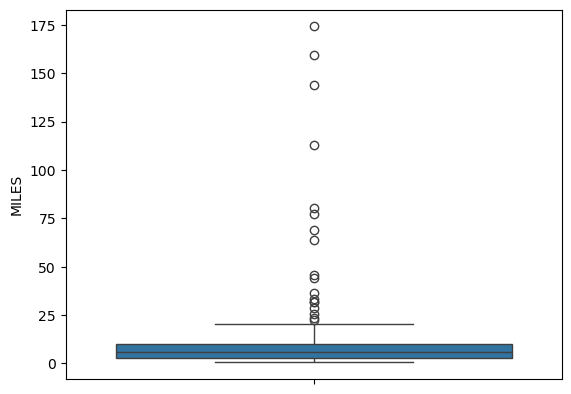

In [56]:
sns.boxplot(data['MILES'])

<Axes: ylabel='MILES'>

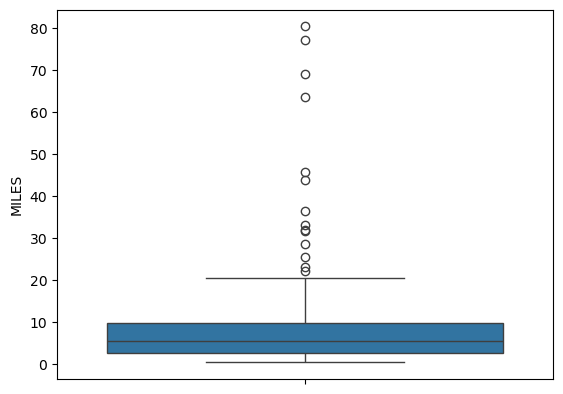

In [57]:
sns.boxplot(data[data['MILES']<100]['MILES'])

<Axes: ylabel='MILES'>

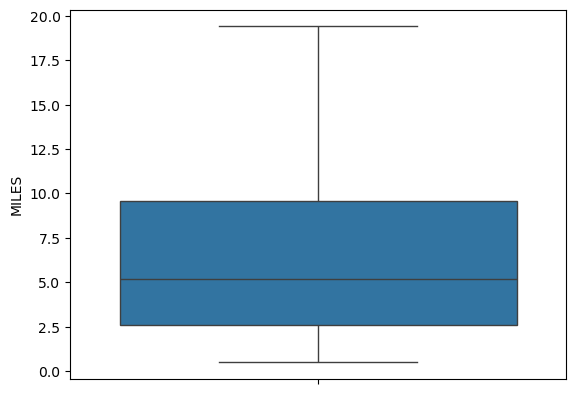

In [58]:
sns.boxplot(data[data['MILES']<20]['MILES'])

      OBSERVATION: PEOPLE MOST COMMONLY BOOK CABS FOR RIDES UNDER 10 MILES AND MORE THAN 2.5 MILES

C:\Users\Admin\AppData\Local\Temp\ipykernel_9788\2224392873.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['MILES']<20]['MILES'])


<Axes: xlabel='MILES', ylabel='Density'>

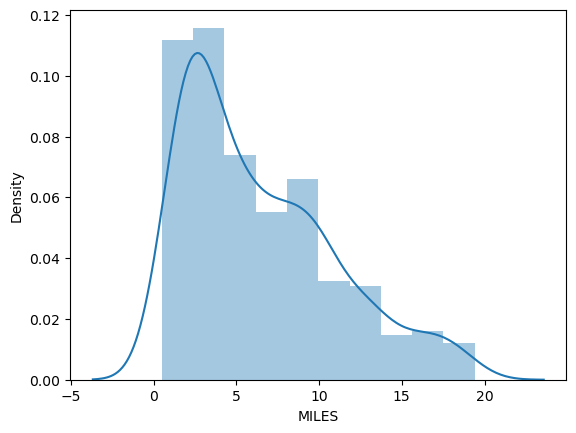

In [59]:
sns.distplot(data[data['MILES']<20]['MILES'])